# Сравнение изменений в приоритизации гипотез при применении RICE вместо ICE

**Описание проекта**  У нас есть список гипотез для увеличения выручки. Нам нужно приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты. 

**Цель проекта:** Приоритизировать гипотезы по ICE и RICE

**План работы:** Открыть и изучить данные, применить фреймворки ICE и RICE, выделить самую рабочую гипотезу

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
pd.options.display.max_colwidth = 130 
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
# переведем названия столбцов к нижнему регистру 
data.columns = data.columns.str.lower() 

**Применим фреймворк ICE для приоритизации гипотез**

In [5]:
data['ice'] = data['impact'] * data['confidence'] / data['efforts']

In [6]:
data.sort_values(by='ice', ascending=False).round(2)

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


**Применим фреймворк RICE для приоритизации гипотез**

In [7]:
data['rice'] = data['reach'] * data['impact'] * data['confidence']/data['efforts']
data.sort_values(by='rice', ascending=False).round(2)

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


Главное отличие фреймворка ICE от RICE, это колонка Reach (охват). Если наши изменения затрагивают большее количество людей, то показатель RICE будет выше. Те гипотезы, что имеют маленький охват, упали в приоритете. Это видно по гипотезе под индексом 8, а гипотеза под индексом 7, которая имеет охват 10 вышла на 1 место 

# А/В тест 

**Цель проекта:** изучить данные А/В-теста и дать ответ заказчику по результатам, менять рекламу или нет

**Краткое описание проекта:** С помощью графиков кумулятивновного среднего, 

**Основные этапы проекта** У нас есть результаты А/В тестирования и нас нужно проанализировать полученные данные, а именно: построить график кумулятивной выручки по группам, построить график кумулятивного среднего чека по группам, построить график относительного изменения кумулятивного среднего чека группы B к группе A, построить график кумулятивного среднего количества заказов на посетителя по группам, построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A, построить точечный график количества заказов по пользователям, построить 95-й и 99-й перцентили количества заказов на пользователя, построить точечный график стоимостей заказов, построить 95-й и 99-й перцентили стоимости заказов, выбрать границу для определения аномальных заказов, Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.
Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

## Прочтём данные из файлов с результатами A/B-тестирования

In [8]:
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
register_matplotlib_converters()
import scipy.stats as stats
import pandas as pd

In [9]:
orders = pd.read_csv('/datasets/orders.csv', sep=',')
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [10]:
visitors = pd.read_csv('/datasets/visitors.csv', sep=',')
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [11]:
orders.info()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


### Проверим данные на пропуски и дуликаты 

In [12]:
# Проверим на количество пропусков 
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [13]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

Пропусков в данных нет

In [14]:
orders.duplicated().sum()

0

In [15]:
visitors.duplicated().sum()

0

В таблицах нет дубликатов 

### Изучим данные

In [16]:
orders.groupby('group').count()

,transactionId,visitorId,date,revenue
group,,,,
A,557,557,557,557
B,640,640,640,640


In [17]:
orders.sort_values(by='date',ascending=False)

,transactionId,visitorId,date,revenue,group
956,3122496224,3255082731,2019-08-31,1188,B
1013,83566152,232979603,2019-08-31,60,A
957,3759988715,1762249948,2019-08-31,5170,B
958,1207636128,3640080856,2019-08-31,3390,A
959,3027277658,2973964255,2019-08-31,1850,B
...,...,...,...,...,...
142,854120002,544963298,2019-08-01,1490,B
141,602399015,3967698036,2019-08-01,299,A
140,2774185760,975516572,2019-08-01,1190,B
139,4141167864,2716752286,2019-08-01,7990,B


In [18]:
visitors.sort_values(by='date',ascending=False)

,date,group,visitors
61,2019-08-31,B,718
30,2019-08-31,A,699
29,2019-08-30,A,490
60,2019-08-30,B,490
28,2019-08-29,A,577
...,...,...,...
33,2019-08-03,B,509
32,2019-08-02,B,581
1,2019-08-02,A,619
0,2019-08-01,A,719


В обеих таблицах данные приведены за 1 месяц. с 01.08 по 31.08

In [19]:
print(orders.groupby('visitorId').agg({'group' : 'nunique'}).query('group > 1').count())

group    58
dtype: int64


In [20]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [21]:
dusers = orders.groupby('visitorId').agg({'group' : 'nunique'}).reset_index().query('group>1')['visitorId'].unique()
orders = orders.query('visitorId not in @dusers')

orders.groupby('visitorId').agg({'group' : 'nunique'}).query('group>1').count()

group    0
dtype: int64

In [22]:
orders = orders.query('visitorId not in @dusers')

orders.groupby('visitorId').agg({'group' : 'nunique'}).query('group>1').count()

group    0
dtype: int64

Не осталось юзеров которые попали в обе группы. Можно было и оставить, т.к в обе группы добавляются одинаковые суммы чисел 

## Создадим массив уникальных пар значений дат и групп теста методом drop_duplicates()

In [23]:
datesGroups = orders[['date','group']].drop_duplicates() 
# создаем массив уникальных пар значений дат и групп теста

In [24]:
# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']) 

In [25]:
# получаем агрегированные кумулятивные по дням данные о посетителях 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [26]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


## Построим графики кумулятивной выручки по дням и группам A/B-тестирования:

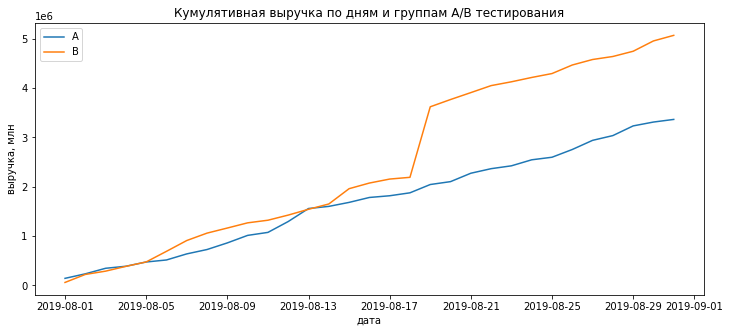

In [27]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.figure(figsize=(12, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend();

plt.title('Кумулятивная выручка по дням и группам А/В тестирования')
plt.ylabel('выручка, млн');
plt.xlabel('дата');

**Вывод:** в начале тестирования выручка растет равномерно, но в середине теста происходит резкий скачок выручки в группе В, а в группе А выручка продолжает равномерно расти.  Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

## Построим график кумулятивного среднего чека по группам

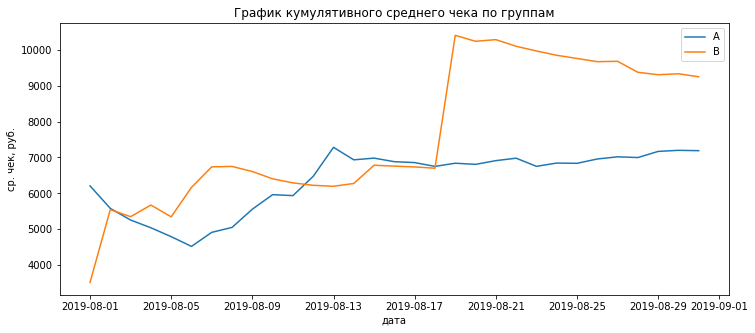

In [28]:
plt.figure(figsize=(12, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend();
plt.title('График кумулятивного среднего чека по группам')
plt.ylabel('ср. чек, руб.')
plt.xlabel('дата');

**Вывод:** Средний чек к концу исследования становится равномерным, но в начале большие скачки, особенно в группе В. Скорее всего на средний чек влияют большие заказы.

## Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

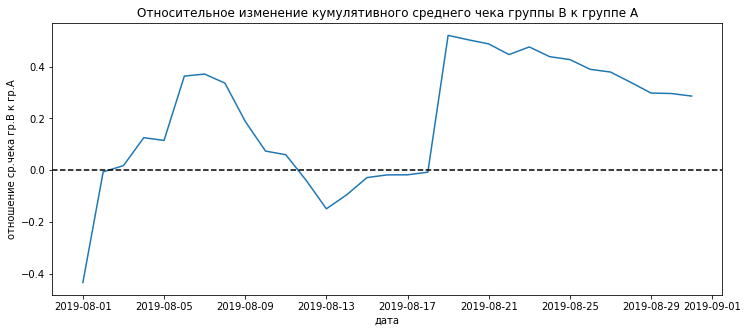

In [29]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(12, 5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');

plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.ylabel('отношение ср.чека гр.В к гр.А')
plt.xlabel('дата');


**Вывод:** По графику видно, что что есть резки скачки. Это говорит о том, что в данныз есть крупные заказы и выбросы. В начале теста отношение среднего чека группы б проигрывало, но достаточно быстро вырвалось вперед. 7-8 сентября показатель падает. 18 сентября происходит резкий скачок.

## Построим график кумулятивного среднего количества заказов на посетителя по группам

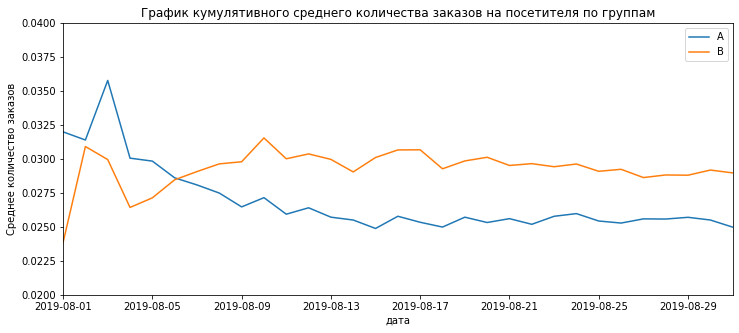

In [30]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(12, 5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend();

plt.axis(["2019-08-01", '2019-08-31', 0.02, 0.04]);
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.ylabel('Cреднее количество заказов')
plt.xlabel('дата');


**Вывод:** Графики сильно отличаются друг от друга. У обоих групп в начале исследования произошел резкий скачок и затем следует сильная просадка, но график группы В заново стремится вверх, когда график группы А падает. К концу исследования начали стабилизироваться, но средний чек группы В выше 

## Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

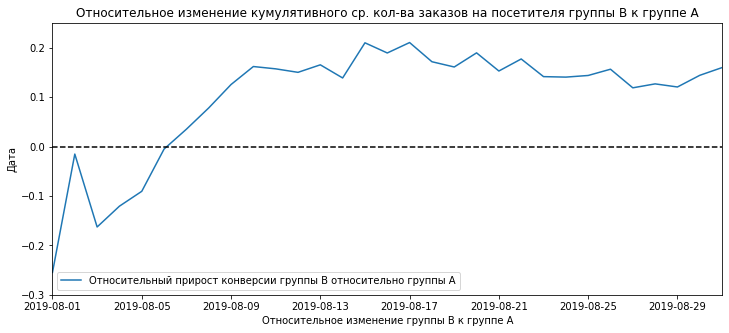

In [31]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(12, 5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend();

plt.axhline(y=0, color='black', linestyle='--');

plt.axis(["2019-08-01", '2019-08-31', -0.3, 0.25]);
plt.title('Относительное изменение кумулятивного ср. кол-ва заказов на посетителя группы B к группе A')
plt.xlabel('Относительное изменение группы В к группе А')
plt.ylabel('Дата');

**Вывод:**  В начале теста показатели группы В уступали показателям группы А, но потом случился резкий скачок и показатели группы В значительно выше чем у группы А 

## Построим точечный график количества заказов по пользователям.

In [32]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['visitorId', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,visitorId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


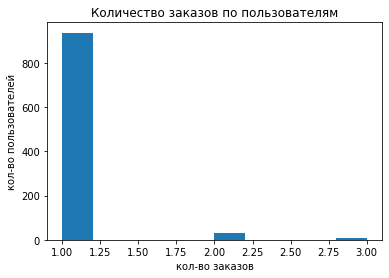

In [33]:
plt.hist(ordersByUsers['orders']);
plt.title('Количество заказов по пользователям')
plt.ylabel('кол-во пользователей')
plt.xlabel('кол-во заказов');

По графику видно, что в основном заказывали не более 2 раз, но есть пользователи кто сделал и 3 заказа

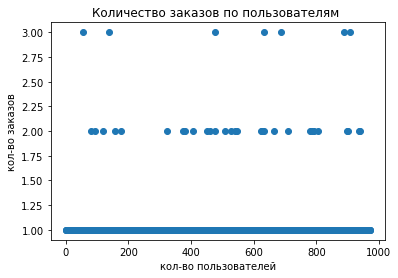

In [34]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Количество заказов по пользователям ')
plt.ylabel('кол-во заказов')
plt.xlabel('кол-во пользователей');


Есть 7 пользлвателей, кто сделал 3  заказа, но в основном заказывают до 1 раз  

## Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. 

In [35]:
print(np.percentile(ordersByUsers['orders'], [95, 99]));

[1. 2.]


95% пользователей оформляем не больше 1 заказ, в 1% пользователей оформили больше 2 заказов

## Построим точечный график стоимостей заказов.

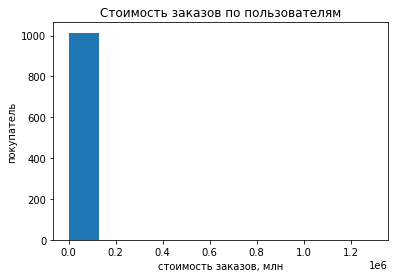

In [36]:
plt.hist(orders['revenue']);
plt.title('Стоимость заказов по пользователям')
plt.ylabel('покупатель')
plt.xlabel('стоимость заказов, млн');


По гистограмме нет особо выделяющихся заказов, все заказы до 100к

In [37]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


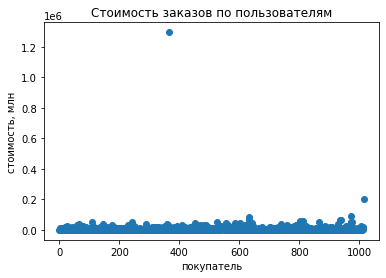

In [38]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']);
plt.title('Стоимость заказов по пользователям')
plt.ylabel('стоимость, млн')
plt.xlabel('покупатель');



Сразу видно 2 выброса, остальные не особо выделяются 

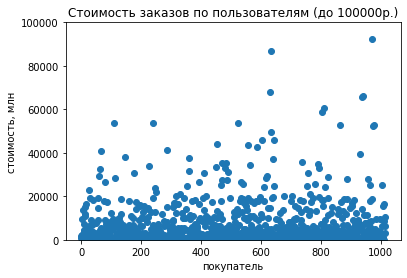

In [39]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']);
plt.ylim(0, 100000)
plt.title('Стоимость заказов по пользователям (до 100000р.)')
plt.ylabel('стоимость, млн')
plt.xlabel('покупатель');


Если делать срез до 120000, то видно, что больше всех заказов на сумму до 20000р.

## Посчитаем 95-й и 99-й перцентили стоимости заказов

In [40]:
print(np.percentile(orders['revenue'], [95, 99]))

[26785. 53904.]


Только 1% клиентов заказали на сумму от 54к, а 5% на сумму от 26,8к. За аномалию будем считать сумму от 54к рублей

## Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

**Н0:** различий в среднем количестве заказов между группами нет. 

**Н1:** различия в среднем между группами есть.

In [41]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5)) 

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              23           142779              17   
1 2019-08-02              19            91602              23   
2 2019-08-03              24           112473              14   
3 2019-08-04              11            41176              14   
4 2019-08-05              22            86383              21   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0            59758                  23               142779   
1           162043                  42               234381   
2            67049                  66               346854   
3            96890                  77               388030   
4            89908                  99               474413   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  17                59758               719   
1                  40               221801               619   
2                  54               28

In [42]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))
 

0.011
0.160


## Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

**H0**: различий в среднем чеке между группами нет. 

**H1**: различия в среднем чеке между группами есть. 

In [43]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.829
0.287


Различие в средних значительно выше p-value 0.05 и нет основания отвергать нулевую гипотезу. Средний чек группы В на 29 больше чем у группы А

## Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

**Примем за аномальных пользователей тех, кто заказал дороже чем на 30000 и сделал больше 3 заказов**

In [44]:
abs = np.percentile(ordersByUsers['orders'], [95])
abs

array([1.])

In [45]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 3]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 3]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

1099    148427295
928     204675465
684     358944393
648     382846391
751     689129267
Name: visitorId, dtype: int64
42


У нас в сумме 57 таких клиентов 

In [46]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [47]:
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.013
0.161


относительное различие  в с реднем заказе все еще ниже, чем p-value=0.05, а в группе В на 15% больше заказов и без выбросов, отвергаем гипотезу 

## Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

In [48]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

0.842
-0.031


Нет основания отвергать гипотезу Но, а средний чек в группе В на 2% ниже

## Вывод 

Есть статистически значимое различие по среднему количеству заказов между группами  по «сырым» и по данным после фильтрации аномалий; 
Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий, но в группе В средний чек на 2% ниже; 
График различия среднего количества заказов между группами сообщает, что результаты группы В лучше чем у группы А;
График различия среднего чека говорит о том, что результаты группы B лучше чем у группы А, но где-то в середине теста была просадка, а в последей 1/3 график идет в сторону 0;

Исходя из обнаруженных данных, тест стоит остановить и признать, что реклама группы В выигрышна. Группа В показывает куда лучше показатели по количеству заказов (на 15%) по сравнению с группой А, хоть и немного проигрывает по чеку (на 2%)